In [3]:
import yaml
import numpy as np
import pandas as pd

In [4]:
with open("C:/Users/there/Desktop/User Controlled Analysis/values.yaml", 'r') as file:
    config = yaml.safe_load(file)

In [5]:
data = [12,24,12,23,21,32,43,54,34,23,54,64,71,15,16,36]

df = pd.DataFrame({
    "Data": data
})


In [6]:
method_map = {
    'mean': np.mean,
    'median': np.median,
    'mode': lambda x: x.mode(),
    'variance': np.var,
    'standard deviation': np.std
}

In [7]:
if config['aggregate']['method'].lower() in method_map:
    value = method_map[config['aggregate']['method'].lower()](df['Data'])
else:
    raise ValueError(f"The method you entered is not available.")

In [8]:
print(f"You said you wanted to find the {config['aggregate']['method']}.")
print(f"The {config['aggregate']['method']} is:\n{value}")

You said you wanted to find the mean.
The mean is:
33.375


In [9]:
print(f"You set summary to {config['statistics']['summary']}.")

if config['statistics']['summary'] == True:
    print("Here's your statistical summary:")
    print(df.describe())
else:
    print(f"Since you set summary to false there is no statistical summary.")

You set summary to False.
Since you set summary to false there is no statistical summary.


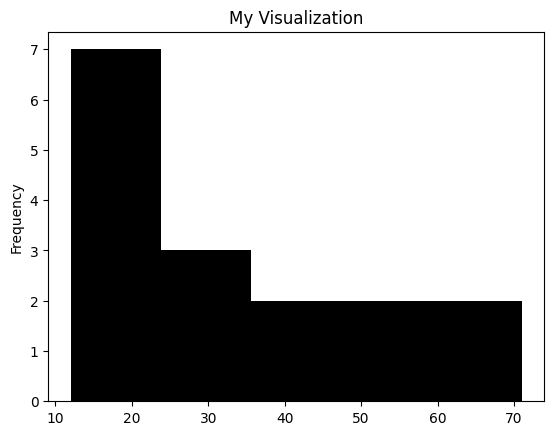

In [10]:
visualization_map = {
    'histogram': 'histogram',
    'bar': 'bar',
    'line': 'line'
}

try:
    if config['visualization']['type'] in visualization_map:
        if config['visualization']['type'].lower() == 'histogram':
            df['Data'].plot(kind='hist', bins=config['visualization']['bins'],
                            color=config['visualization']['color'].lower(), title=config['visualization']['title'])
        else:
            df['Data'].plot(kind=config['visualization']['type'].lower(), color=config['visualization']['color'].lower(),
                            title=config['visualization']['title'])
    else:
        raise ValueError(f"Not a valid visual for this program. Visualization types allowed are: 'histogram', 'bar', 'line'.")
except ValueError as e:
    print(f"Error: {e}")